# this notebook produces 3D cut (vertical: B_i + two of (x,y,z)) with interpolation

In [ ]:
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import scipy


In [2]:
df1 = pd.read_csv('Mapping_0809_RUN1.csv')
df2 = pd.read_csv('Mapping_0809_RUN2.csv')
df3 = pd.read_csv('Mapping_0809_RUN3.csv')
df4 = pd.read_csv('Mapping_0809_RUN4.csv')

df_all0 = df1.append(df2)
df_all1  = df_all0.append(df3)
df_all  = df_all1.append(df4)


In [3]:
u_max = np.max(df_all.u)
v_max = np.max(df_all.v)
w_max = np.max(df_all.w)
u_min = np.min(df_all.u)
v_min = np.min(df_all.v)
w_min = np.min(df_all.w)

In [5]:
v_floors = df_all1.v.unique()

v_all = df_all.v.unique()
w_all = df_all.w.unique()
u_all = df_all.u.unique()
print len(v_all)
print len(u_all)
print len(w_all)
print u_all
print v_all
print w_all


11
10
14
[-87.95 -47.95  -7.95  32.05  72.05 112.05 152.05  12.05 -27.95 -67.95]
[-146.13 -106.13  -66.13  -26.13   13.87  -46.13   42.37   82.37  122.37
  162.37  202.37]
[-192.75 -152.75 -112.75  -72.75  -32.75    7.25   47.25   87.25  127.25
  167.25  207.25  247.25  287.25  327.25]


#### 2D interploation near the floor


#### Horizontal cuts


In [95]:
# v_cut = v_floors[6]
idx_cut = 10
v_cut=v_all[idx_cut]

df_all_sub = df_all[df_all.v==v_cut]
print df_all_sub.index.size
u_min, u_max= np.min(df_all_sub.u), np.max(df_all_sub.u)
w_min, w_max= np.min(df_all_sub.w), np.max(df_all_sub.w)
NL = 50 # default os 50

u_dense, w_dense = np.meshgrid(np.linspace(u_min, u_max, NL), np.linspace(w_min,w_max, NL))


import scipy.interpolate as interp
Bu_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bu_dense = Bu_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bv_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_v, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bv_dense = Bv_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bw_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_w, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bw_dense = Bw_rbf(u_dense, w_dense)  # not really a function, but a callable class instance



IndexError: index 11 is out of bounds for axis 0 with size 11

In [93]:
# df_all_sub[['u','w', 'B_u','B_v','B_w']]

<IPython.core.display.Javascript object>


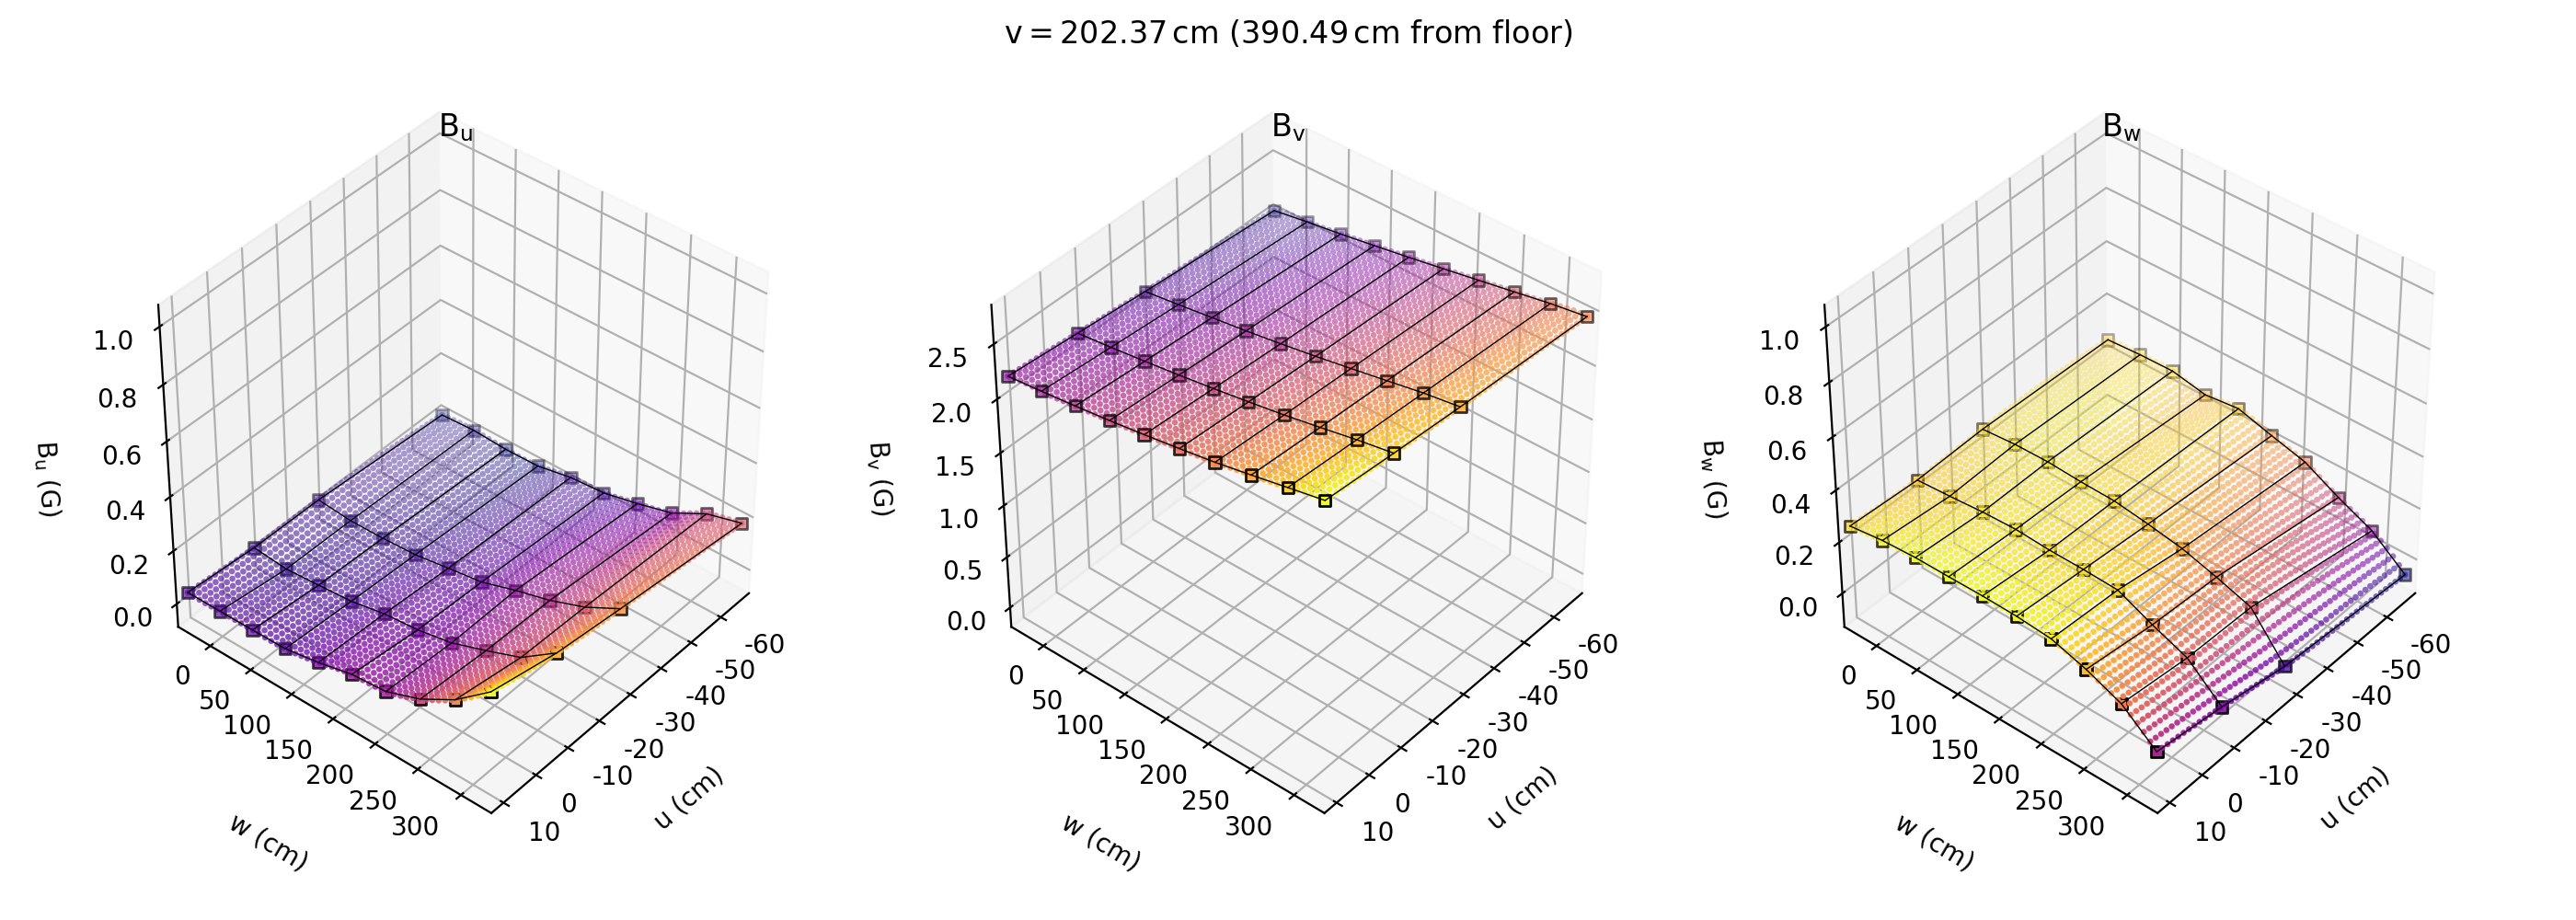

In [94]:
fig1 = plt.figure(facecolor='white', figsize=(14,5))

ax1 = fig1.add_subplot(131, projection='3d')
ax2 = fig1.add_subplot(132, projection='3d')
ax3 = fig1.add_subplot(133, projection='3d')


# ax1.tick_params(axis='x', rotation=-15, labelsize=10)
# ax1.tick_params(axis='y', rotation=-25, labelsize=10)
# ax1.tick_params(axis='y', rotation=-30, labelsize=11)
# ax1.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax1, ax2, ax3]:
    axi.view_init(elev=40., azim=40)
    
    axi.set_xlim3d(u_min,u_max)
    axi.set_ylim3d(w_min,w_max)    
#    prarmeters for elev=40., azim=40)
    axi.set_xticklabels(ax1.get_xticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='left')
    axi.set_yticklabels(ax1.get_yticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='right')    
#     axi.set_xticklabels(ax1.get_xticks(), rotation=50,
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax1.get_yticks(), 
#                     verticalalignment='baseline',rotation=-25,
#                     horizontalalignment='left')

    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
                                  

    axi.set_xlabel('$\mathsf{u}$ (cm)', rotation=7, labelpad=10)
    axi.set_ylabel('$\mathsf{w}$ (cm)',  labelpad=15)
    
for wi in w_all:
    ax1.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_u, '-', c='black', lw=.5)
    ax2.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_v, '-', c='black', lw=.5)
    ax3.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_w, '-', c='black', lw=.5)
    
#     ax1.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_u, '-', c='black', lw=.5)
#     ax2.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_v, '-', c='black', lw=.5)
#     ax3.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_w, '-', c='black', lw=.5)
for ui in u_all:
#     ax1.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_u, '-', c='black', lw=.5)
#     ax2.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_v, '-', c='black', lw=.5)
#     ax3.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_w, '-', c='black', lw=.5)
    ax1.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_u, '-', c='black', lw=.5)
    ax2.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_v, '-', c='black', lw=.5)
    ax3.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_w, '-', c='black', lw=.5)


# sc1 = ax1.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)
sc1_int = ax1.scatter(u_dense, w_dense, Bu_dense,  c=np.concatenate(Bu_dense), marker='.', lw=.1, cmap=cm.plasma)
sc2_int = ax2.scatter(u_dense, w_dense, Bv_dense,  c=np.concatenate(Bv_dense), marker='.', lw=.1, cmap=cm.plasma)
sc3_int = ax3.scatter(u_dense, w_dense, Bw_dense,  c=np.concatenate(Bw_dense), marker='.', lw=.1, cmap=cm.plasma)

sc1 = ax1.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_u,c=df_all_sub.B_u, edgecolor='black',marker='s', cmap=cm.plasma)
sc2 = ax2.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_v,c=df_all_sub.B_v, edgecolor='black',marker='s', cmap=cm.plasma)
sc3 = ax3.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_w,c=df_all_sub.B_w, edgecolor='black',marker='s', cmap=cm.plasma)


ax1.set_title('$\mathsf{B_u}$') 
ax1.set_zlabel('$\mathsf{B_u}$ (G)', rotation=180, labelpad=10)


ax2.set_zlabel('$\mathsf{B_v}$ (G)', rotation=180, labelpad=10)
ax2.set_title('$\mathsf{B_v}$')

ax3.set_zlabel('$\mathsf{B_w}$ (G)', rotation=180, labelpad=10)
ax3.set_title('$\mathsf{B_w}$')

fig1.suptitle('$\mathsf{v=%.2f\,cm\,\, (%.2f\,cm\,\,from\,\,floor  )}$'%(v_cut,v_cut+188.12))

fig1.tight_layout(pad=3,rect=[0, 0, 1, 0.99])

fig1.savefig('plots_0809_int_v/Mapping0809_v_id_%02d%.2f.png' %(idx_cut,v_cut))

### Vertical cuts

In [122]:
# v_cut = v_floors[6]
idx_ucut = 10
u_cut=u_all[idx_ucut]

df_all_sub = df_all[df_all.u==u_cut]
print df_all_sub.index.size


v_min, v_max= np.min(df_all_sub.v), np.max(df_all_sub.v)
w_min, w_max= np.min(df_all_sub.w), np.max(df_all_sub.w)
NL = 50 # default os 50

v_dense, w_dense = np.meshgrid(np.linspace(v_min, v_max, NL), np.linspace(w_min,w_max, NL))


import scipy.interpolate as interp
# Bu_rbf = interp.Rbf(df_all_sub.v, df_all_sub.w, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bu_rbf = interp.Rbf(df_all_sub.v, df_all_sub.w, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation

Bu_dense = Bu_rbf(v_dense, w_dense)  # not really a function, but a callable class instance


Bv_rbf = interp.Rbf(df_all_sub.v, df_all_sub.w, df_all_sub.B_v, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bv_dense = Bv_rbf(v_dense, w_dense)  # not really a function, but a callable class instance

Bw_rbf = interp.Rbf(df_all_sub.v, df_all_sub.w, df_all_sub.B_w, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bw_dense = Bw_rbf(v_dense, w_dense)  # not really a function, but a callable class instance



IndexError: index 10 is out of bounds for axis 0 with size 10

<IPython.core.display.Javascript object>


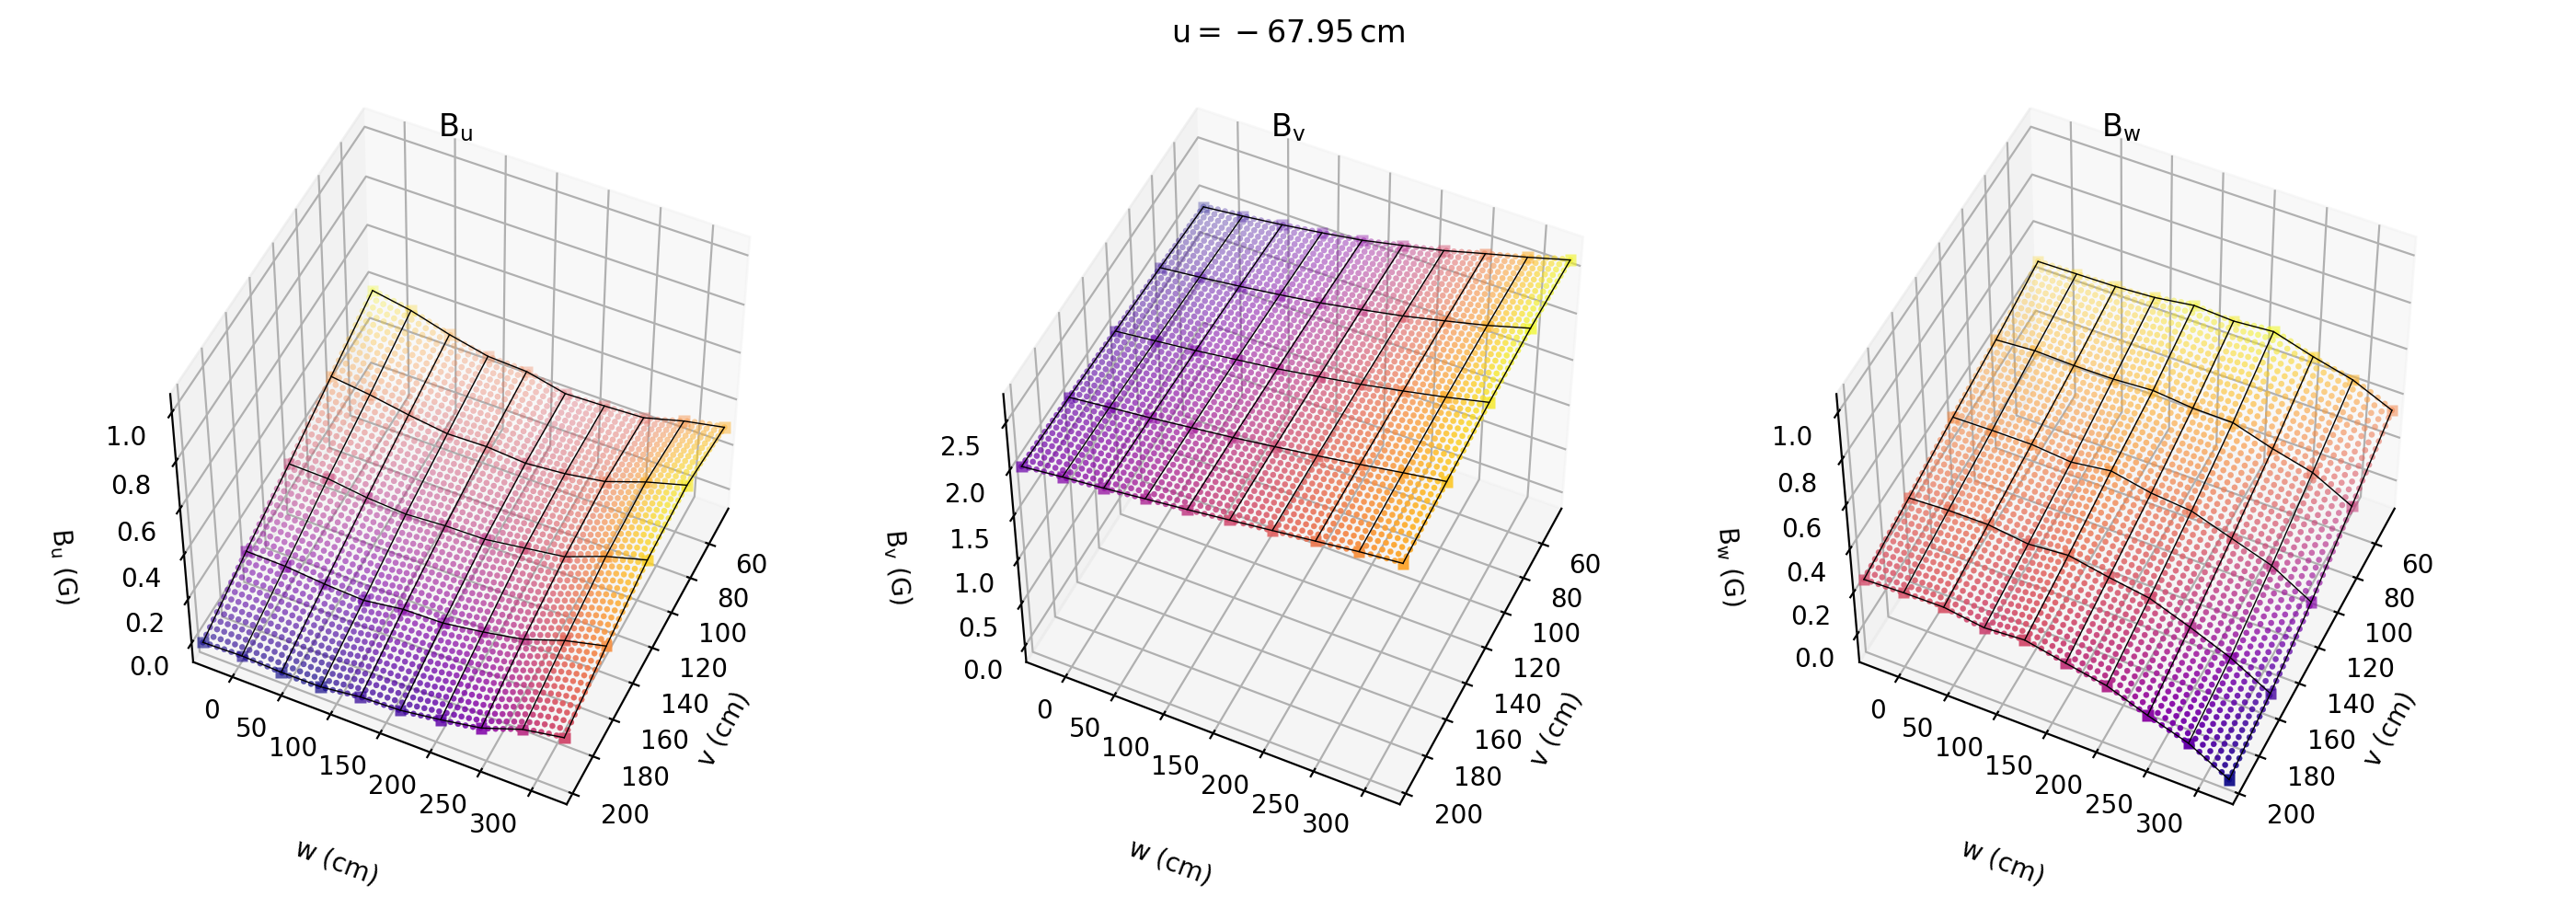

In [121]:
fig2 = plt.figure(facecolor='white', figsize=(14,5))

ax4 = fig2.add_subplot(131, projection='3d')
ax5 = fig2.add_subplot(132, projection='3d')
ax6 = fig2.add_subplot(133, projection='3d')


# ax4.tick_params(axis='x', rotation=-15, labelsize=10)
# ax4.tick_params(axis='y', rotation=-25, labelsize=10)
# ax4.tick_params(axis='y', rotation=-30, labelsize=11)
# ax4.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax4, ax5, ax6]:
    axi.view_init(elev=50., azim=25)
    
    axi.set_xlim3d(v_min,v_max)
    axi.set_ylim3d(w_min,w_max)    
# #    prarmeters for elev=40., azim=40)
#     axi.set_xticklabels(ax4.get_xticks(), 
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax4.get_yticks(), 
#                     verticalalignment='baseline',
#                     horizontalalignment='right')    
#    prarmeters for elev=-148., azim=30)
    axi.set_xticklabels(ax4.get_xticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='left')
    axi.set_yticklabels(ax4.get_yticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='right')    
#     axi.set_xticklabels(ax4.get_xticks(), rotation=50,
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax4.get_yticks(), 
#                     verticalalignment='baseline',rotation=-25,
#                     horizontalalignment='left')

    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
                                  

    axi.set_xlabel('$\mathsf{v}$ (cm)', rotation=7, labelpad=10)
    axi.set_ylabel('$\mathsf{w}$ (cm)',  labelpad=15)
    
for wi in w_all:
    ax4.plot(df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].v,df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].w, df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].B_u, '-', c='black', lw=.5)
    ax5.plot(df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].v,df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].w, df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].B_v, '-', c='black', lw=.5)
    ax6.plot(df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].v,df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].w, df_all_sub.sort_values('v')[df_all_sub.sort_values('v').w==wi].B_w, '-', c='black', lw=.5)
    
#     ax4.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_u, '-', c='black', lw=.5)
#     ax5.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_v, '-', c='black', lw=.5)
#     ax6.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_w, '-', c='black', lw=.5)
for vi in v_all:
#     ax4.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_u, '-', c='black', lw=.5)
#     ax5.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_v, '-', c='black', lw=.5)
#     ax6.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_w, '-', c='black', lw=.5)
    ax4.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].v,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].B_u, '-', c='black', lw=.5)
    ax5.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].v,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].B_v, '-', c='black', lw=.5)
    ax6.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].v,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').v==vi].B_w, '-', c='black', lw=.5)


# sc4 = ax4.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)

sc4_int = ax4.scatter(v_dense, w_dense, Bu_dense,  c=np.concatenate(Bu_dense), marker='.', lw=.1, cmap=cm.plasma)
sc5_int = ax5.scatter(v_dense, w_dense, Bv_dense,  c=np.concatenate(Bv_dense), marker='.', lw=.1, cmap=cm.plasma)
sc6_int = ax6.scatter(v_dense, w_dense, Bw_dense,  c=np.concatenate(Bw_dense), marker='.', lw=.1, cmap=cm.plasma)

sc4 = ax4.scatter(df_all_sub.v, df_all_sub.w, df_all_sub.B_u,c=df_all_sub.B_u, edgecolor='',marker='s', cmap=cm.plasma)
sc5 = ax5.scatter(df_all_sub.v, df_all_sub.w, df_all_sub.B_v,c=df_all_sub.B_v, edgecolor='',marker='s', cmap=cm.plasma)
sc6 = ax6.scatter(df_all_sub.v, df_all_sub.w, df_all_sub.B_w,c=df_all_sub.B_w, edgecolor='',marker='s', cmap=cm.plasma)
ax4.set_title('$\mathsf{B_u}$') 
ax4.set_zlabel('$\mathsf{B_u}$ (G)', rotation=180, labelpad=10)


ax5.set_zlabel('$\mathsf{B_v}$ (G)', rotation=180, labelpad=10)
ax5.set_title('$\mathsf{B_v}$')

ax6.set_zlabel('$\mathsf{B_w}$ (G)', rotation=180, labelpad=10)
ax6.set_title('$\mathsf{B_w}$')

fig2.suptitle('$\mathsf{u=%.2f\,cm}$'%(u_cut))

fig2.tight_layout(pad=3,rect=[0, 0, 1, 0.99])# plt.colorbar(sc, ax=ax4)

fig2.savefig('plots_0809_int_u/Mapping0809_u_id_%02d%.2f.png' %(idx_ucut,u_cut))

In [111]:
ax1.set_xticklabels?

In [30]:
df_all.w.unique()

array([-192.75, -152.75, -112.75,  -72.75,  -32.75,    7.25,   47.25,
         87.25,  127.25,  167.25,  207.25,  247.25,  287.25,  327.25])

In [35]:
wi in df_all_sub.w.unique()

True

In [37]:
df_all_sub[df_all_sub.w==wi]

,cycle,time_start,time_end,u,v,w,B_u,dB_u,B_v,dB_v,B_w,dB_w
50,50,1.565396e+09,1.565396e+09,112.05,-146.13,327.25,0.832966,0.000313,0.575396,0.000176,-0.277362,0.000299
55,55,1.565396e+09,1.565396e+09,152.05,-146.13,327.25,1.522228,0.000142,0.675982,0.000299,0.075550,0.001488
40,40,1.565400e+09,1.565400e+09,72.05,-146.13,327.25,-0.157146,0.000459,0.709478,0.000314,-0.257776,0.002498
44,44,1.565400e+09,1.565400e+09,32.05,-146.13,327.25,-0.958152,0.002306,1.205404,0.001669,0.296566,0.000417
120,120,1.565401e+09,1.565401e+09,-7.95,-146.13,327.25,-1.403952,0.001896,1.889860,0.000195,0.636960,0.004840
124,124,1.565401e+09,1.565401e+09,-47.95,-146.13,327.25,-1.594858,0.000491,2.829240,0.000167,0.890580,0.000348
200,200,1.565403e+09,1.565403e+09,-87.95,-146.13,327.25,-1.558772,0.000560,3.812240,0.000230,1.170466,0.001147


In [50]:
df_all_sub.sort_values('w')

,cycle,time_start,time_end,u,v,w,B_u,dB_u,B_v,dB_v,B_w,dB_w
0,0,1.565393e+09,1.565393e+09,-87.95,-146.13,-192.75,0.501304,0.000271,1.221652,0.000049,1.236878,0.000113
5,5,1.565393e+09,1.565393e+09,-47.95,-146.13,-192.75,0.776560,0.000260,0.865172,0.000216,1.172044,0.000153
10,10,1.565393e+09,1.565393e+09,-7.95,-146.13,-192.75,1.588002,0.000127,0.876048,0.000122,1.037652,0.000213
15,15,1.565393e+09,1.565393e+09,32.05,-146.13,-192.75,2.215020,0.000978,1.579282,0.000592,1.014322,0.001517
20,20,1.565393e+09,1.565393e+09,72.05,-146.13,-192.75,2.385500,0.000400,2.392580,0.000110,1.261846,0.000716
25,25,1.565393e+09,1.565393e+09,112.05,-146.13,-192.75,2.218900,0.001204,3.053140,0.000581,1.113292,0.001242
50,50,1.565394e+09,1.565394e+09,-47.95,-146.13,-152.75,0.629370,0.002855,1.051790,0.003718,1.168850,0.003361
45,45,1.565394e+09,1.565394e+09,-7.95,-146.13,-152.75,1.419266,0.002267,0.886174,0.000318,0.976864,0.003127
55,55,1.565394e+09,1.565394e+09,-87.95,-146.13,-152.75,0.509960,0.000962,1.570000,0.001385,1.269198,0.002001
35,35,1.565394e+09,1.565394e+09,72.05,-146.13,-152.75,2.405460,0.000404,2.612060,0.000089,0.640970,0.001614
